In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import seaborn as sns

In [57]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
print(f"Dimension {df.shape}")

Dimension (10000, 14)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [60]:
#hence no null values

In [61]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [62]:
#check do we have duplicates in customer id
df['CustomerId'].nunique()
#no duplicates

10000

In [63]:
df.duplicated().sum()

0

In [64]:
#drop features which are not required
#rownumber
#customerid
#surname

In [65]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
#check for uniqur values
unique =df.nunique()

In [67]:
unique

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

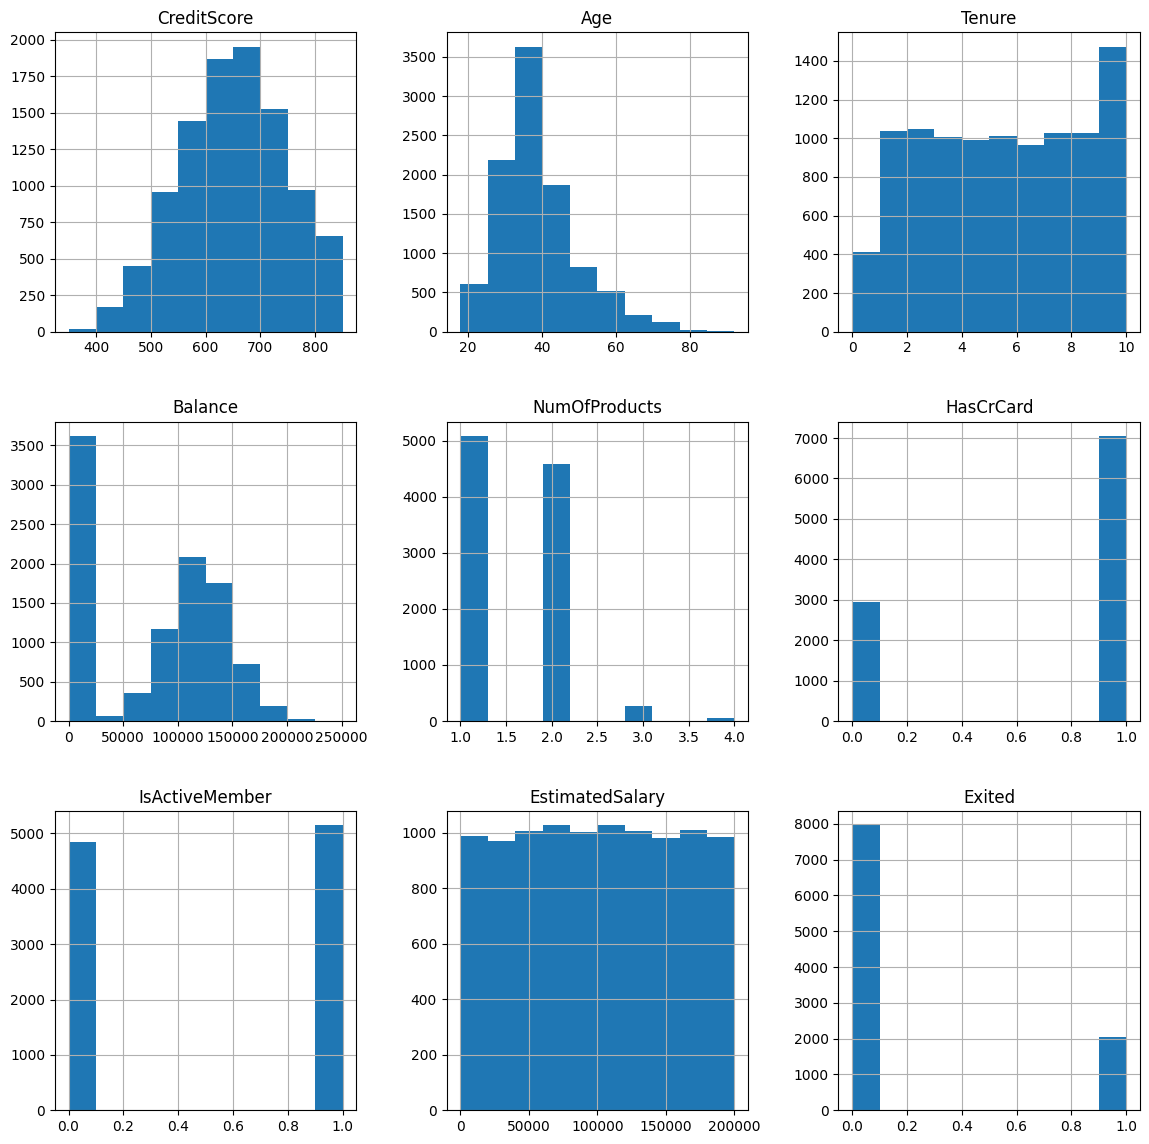

In [68]:
#distribution of numeric features
#plot histogram

df.hist(figsize=(14,14))
plt.show()

In [69]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [70]:

#From the summary statistics and the histograms we can conclude that all features look OK. We do not see any extreme values for any feature.

In [71]:
#consider categorical feature
df.describe(include=['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [72]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [28]:
#This shows us the number of unique classes for each feature. For example, there are more males (5457) than females. And France is most common of 3 geographies in our dataframe. There are no sparse classes

In [73]:


columns_interest = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'Exited']
unique_values={}
for column in columns_interest:
  unique_values[column]=df[column].unique()
for column,values in unique_values.items():
  print(f"Unique values for {column}: {values}")
     

Unique values for Geography: ['France' 'Spain' 'Germany']
Unique values for Gender: ['Female' 'Male']
Unique values for NumOfProducts: [1 3 2 4]
Unique values for HasCrCard: [1 0]
Unique values for IsActiveMember: [1 0]
Unique values for Exited: [1 0]


In [32]:
from collections import Counter

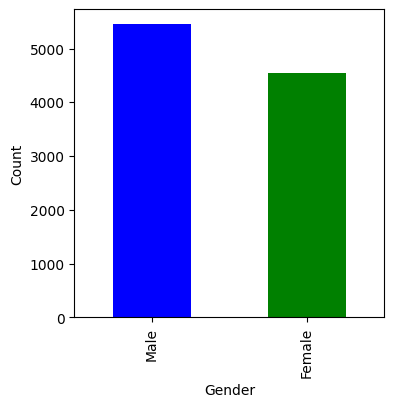

Counter({'Male': 5457, 'Female': 4543})

In [74]:
plt.figure(figsize=(4,4))
df['Gender'].value_counts().plot.bar(color= ['b','g'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()
Counter(df.Gender)

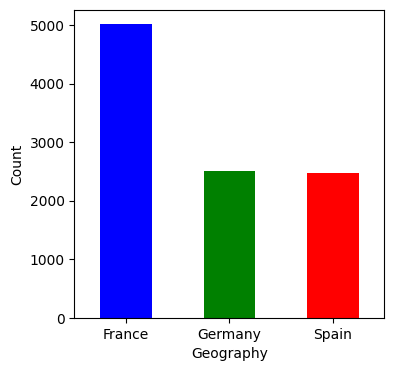

Counter({'France': 5014, 'Germany': 2509, 'Spain': 2477})

In [36]:
#bar plot for geography
plt.figure(figsize=(4,4))
df['Geography'].value_counts().plot.bar(color= ['b','g','r'])
plt.ylabel('Count')
plt.xlabel('Geography')
plt.xticks(rotation=0)
plt.show()
Counter(df.Geography)

In [107]:
#analysis of churned customer
exit_counts = df['Exited'].value_counts(normalize=True)
exit_counts

0    0.7963
1    0.2037
Name: Exited, dtype: float64

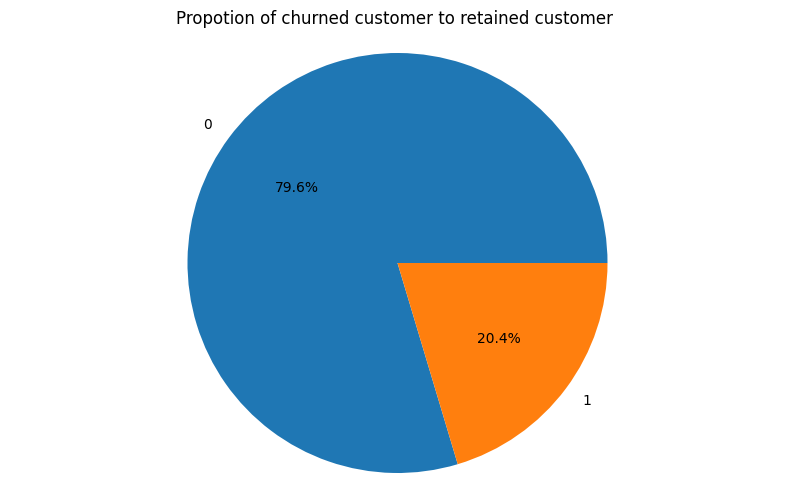

In [76]:
exit_counts


##Now we will visualize the above
plt.figure(figsize=(10,6))
plt.pie(exit_counts,labels=exit_counts.index,autopct="%1.1f%%")
plt.title("Propotion of churned customer to retained customer ")
plt.axis("equal")
plt.show()

0 = Not Exited → ✅ Still with the bank

1 = Exited → ❌ Customer has churned (left the bank)


In [77]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [78]:
#differentiate the churned customers in gender
grouped = df.groupby('Gender')['Exited'].agg(Count = 'value_counts')

In [79]:
grouped

Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

In [80]:
#reorganize
dfgc = grouped
dfgc = dfgc.pivot_table(values = 'Count',index='Gender',columns = ['Exited'])

In [81]:
dfgc

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [82]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [83]:


#now visualization for discrete values
data_discrete = df[["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]]
data_discrete.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember
0,France,Female,1,1,1
1,Spain,Female,1,0,1
2,France,Female,3,1,0
3,France,Female,2,0,0
4,Spain,Female,1,1,1


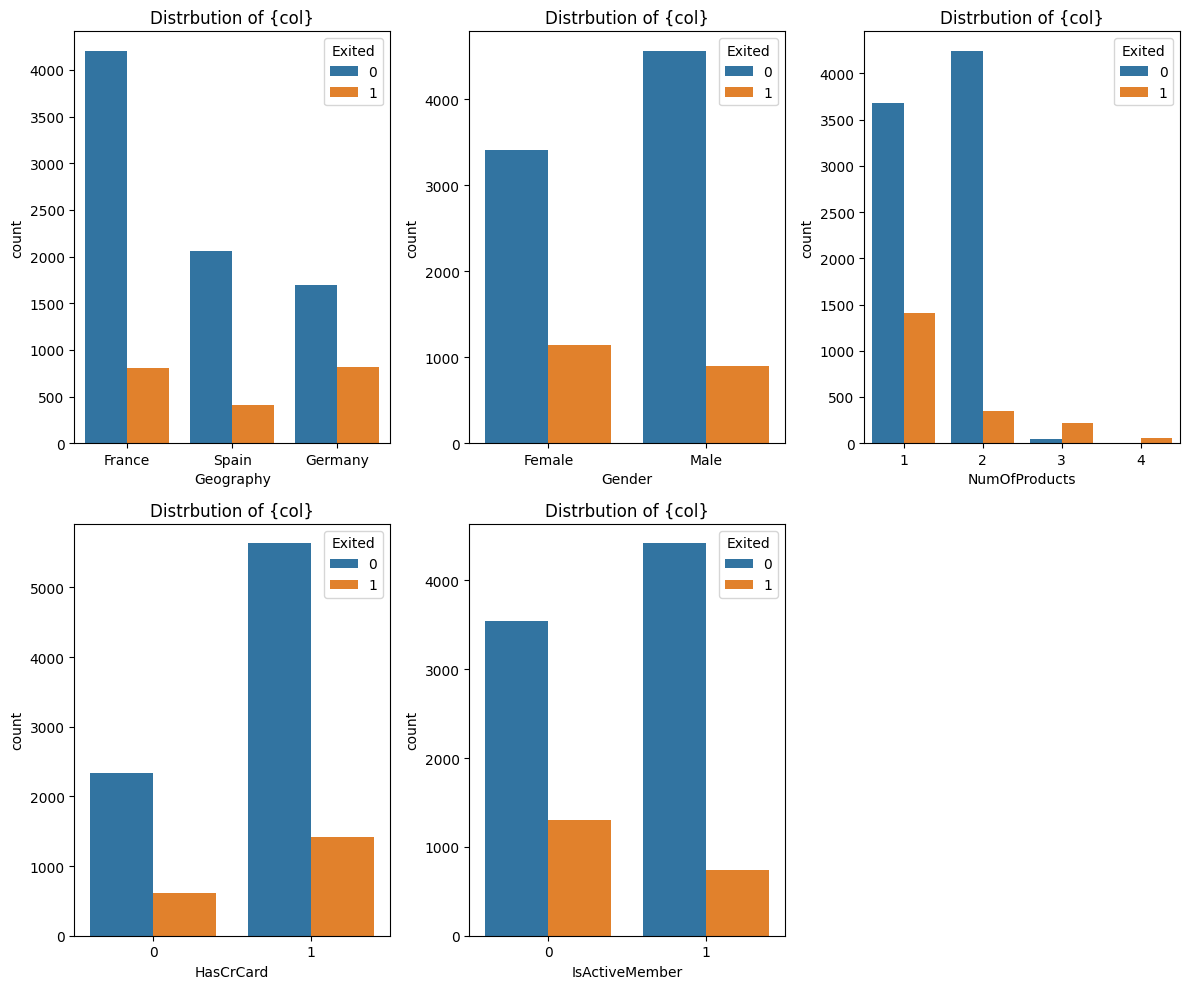

In [85]:
plt.figure(figsize=(12,10))

for i,col in enumerate(data_discrete.columns):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col,data=df,hue='Exited')
    plt.title("Distrbution of {col}")
    plt.tight_layout()
plt.show()

📊 1. Geography
France has the most customers, but lowest churn rate.

Germany shows relatively high churn despite fewer customers — potential risk segment.

Spain has fewer customers and moderate churn.

🔎 Insight: Geography significantly affects churn. Customers from Germany might require targeted retention strategies.

📊 2. Gender
More males are present overall, but females have higher exit rates.

🔎 Insight: Gender shows some correlation with churn. Investigate whether specific services or communication styles are less aligned with female customers.

📊 3. Number of Products
Majority of customers have 1 or 2 products.

Churn is high for customers with 1 product, very low for 2.

Very few with 3 or 4 products, but churn increases again there.

🔎 Insight: Sweet spot is 2 products — most loyal. Customers with 1 product are more likely to leave, so upselling could reduce churn. High-product customers may be overwhelmed or over-sold.

📊 4. Has Credit Card
Not much difference in churn between those who have or don’t have credit cards.

🔎 Insight: No strong pattern — having a credit card doesn't impact churn significantly. It may not be a deciding feature in customer loyalty.

📊 5. Is Active Member
Churn is clearly lower among active members.

🔎 Insight: Engagement matters. Inactive members churn more — retention efforts should focus on activating dormant users.

C:\Users\dell\AppData\Local\Temp\ipykernel_16968\276432578.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


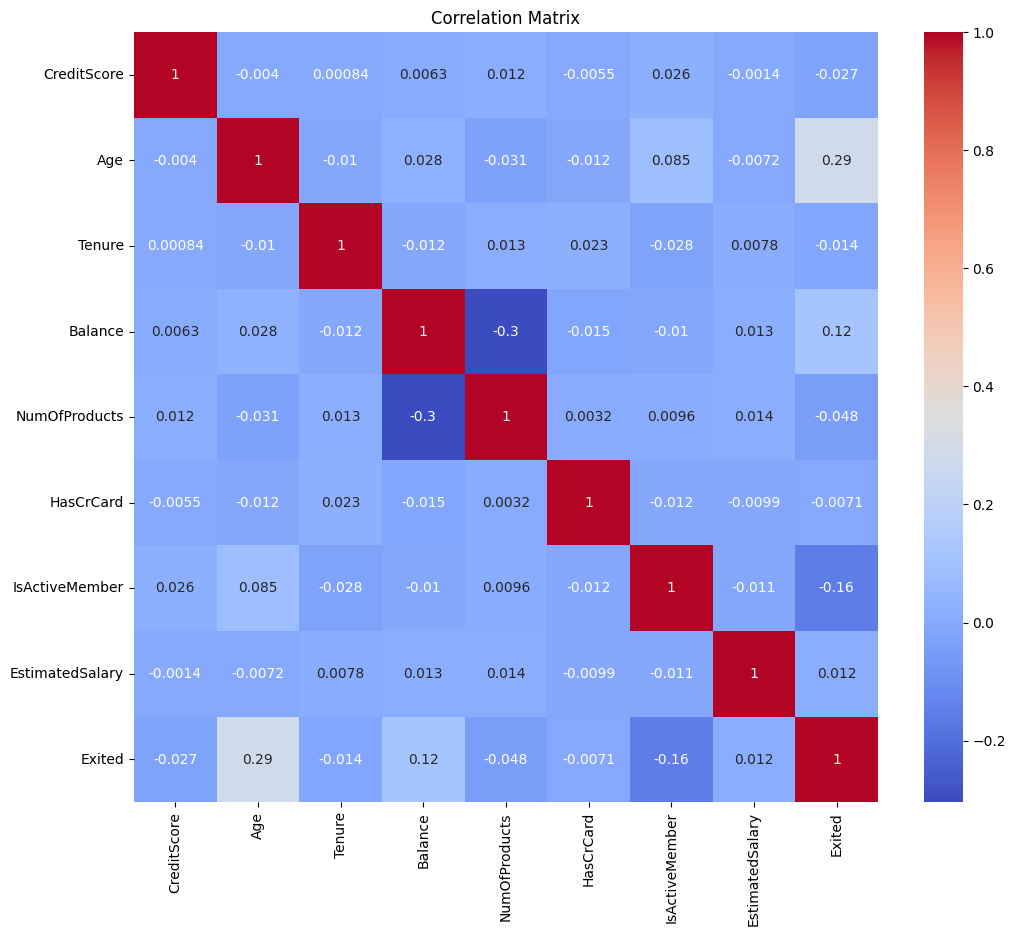

In [86]:
#check correlation between different numeric features among themselves
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

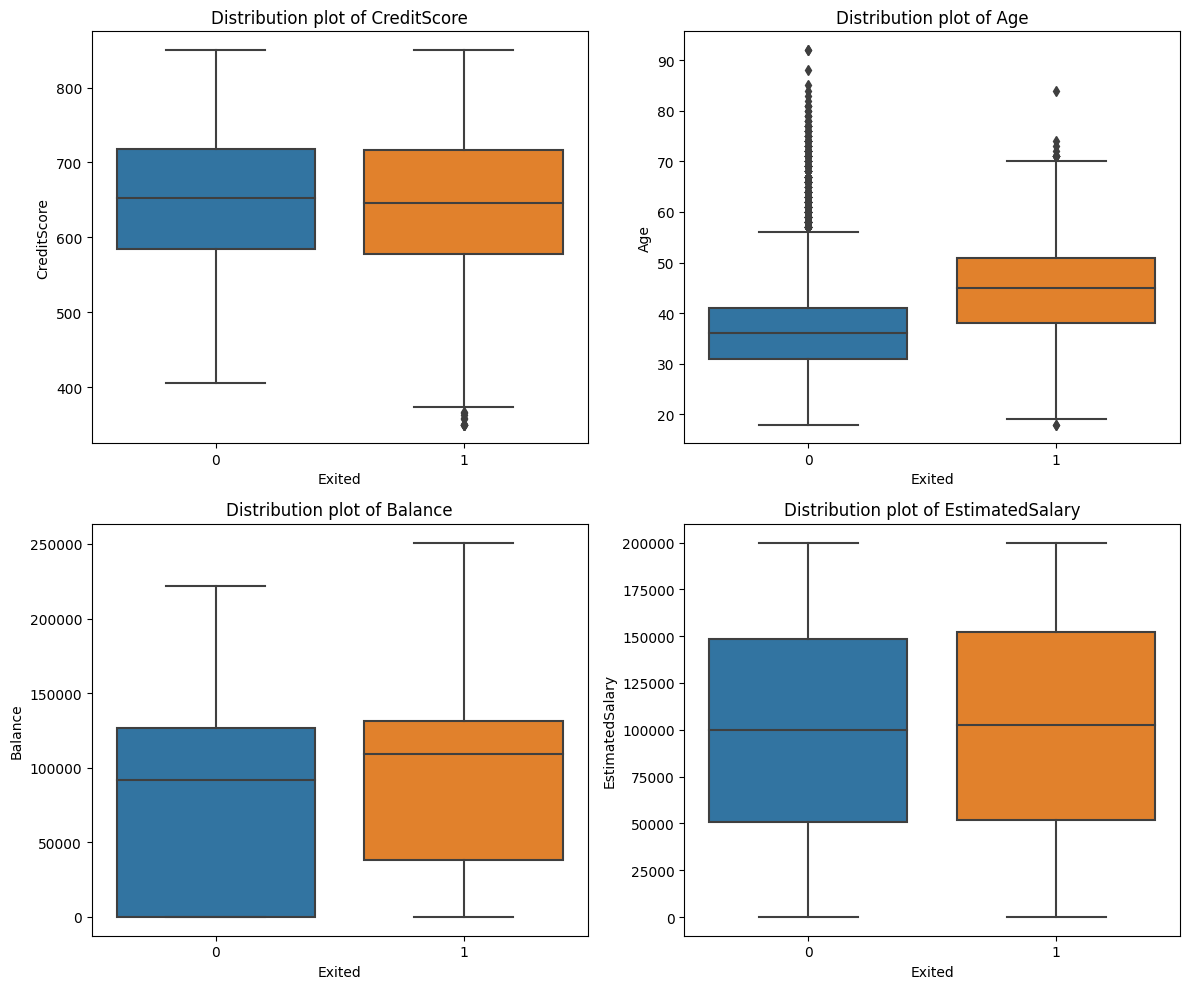

In [87]:

# Now draw box plots for continous columns with respected to exited columns
continous_col = df[["CreditScore","Age","Balance","EstimatedSalary"]]
#create subplots
#Create distribution plot
plt.figure(figsize=(12,10))
for i,col in enumerate(continous_col.columns):
  plt.subplot(2,2,i+1)
  sns.boxplot(data =df,x="Exited",y=col)
  plt.title(f"Distribution plot of {col}")
  plt.tight_layout()
plt.show()

📉 1. Credit Score
The median credit score is similar for both exited and non-exited customers.

A few low-credit-score outliers are more visible among exited customers.

🧠 Insight: Credit Score doesn't strongly influence churn, but customers with very low credit are slightly more prone to exit.

👵 2. Age
Exited customers tend to be older (median age noticeably higher).

Outliers above age 70–90 are mostly among exited users.

🧠 Insight: Age is a strong churn driver. Older customers are more likely to leave — possibly due to retirement, trust issues with tech, or unmet needs.

💰 3. Balance
Median balance is higher for exited customers.

Many exited customers have high balances, but a large chunk still has a zero balance (common in both groups).

🧠 Insight: High-balance customers churning is a red flag. These are valuable clients and should be prioritized for retention.

🧾 4. Estimated Salary
Distribution is similar across both groups — wide range and similar medians.

No evident skew toward churn.

🧠 Insight: Estimated Salary doesn’t affect churn much, so it's likely not a strong predictor on its own.



In [89]:
def histogram_boxplot(data,feature,figsize=(12,6)):

    f,(ax_box,ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    sns.boxplot(data= data,x=feature,ax=ax_box,showmeans=True,color='green')

    sns.histplot(data= data,x=feature,ax=ax_hist,kde=True,color='green')

    ax_hist.axvline(data[feature].mean(),color='red',linestyle='--',label='Mean')
    
    ax_hist.axvline(data[feature].median(),color='black',linestyle='--',label='Median')
    ax_box.set(xlabel='')
    ax_hist.set_xlabel(feature)
    ax_hist.legend()

  
    plt.tight_layout()

  
    plt.show()


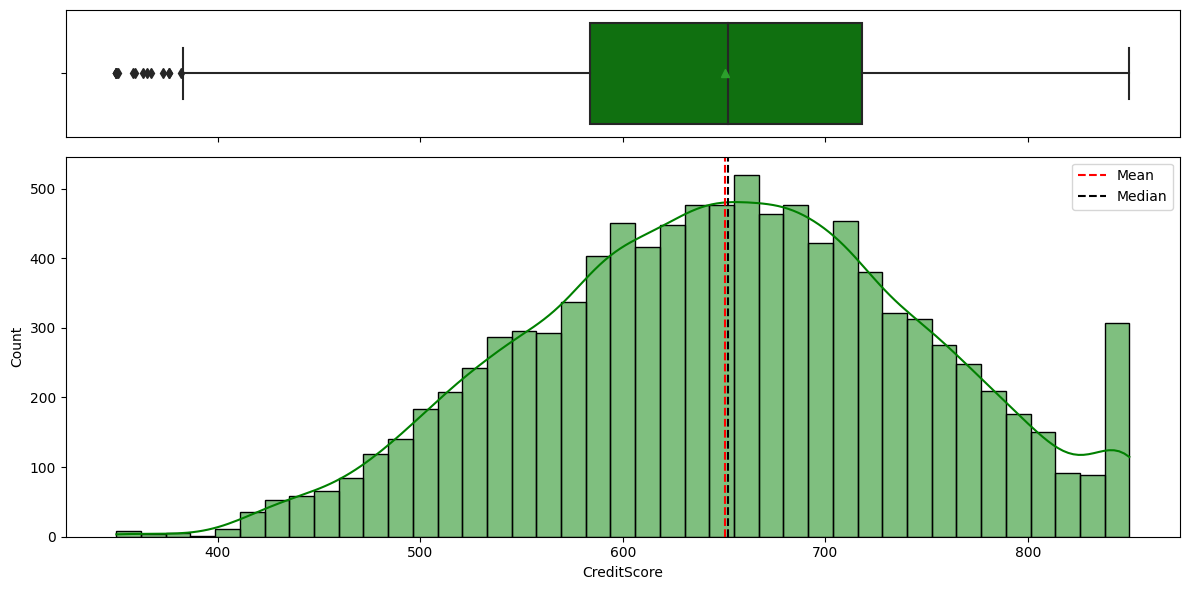

In [90]:
#distribution of credit score of cutomers
histogram_boxplot(df,'CreditScore')

In [91]:
#approximately normal 
#has few outlier on left

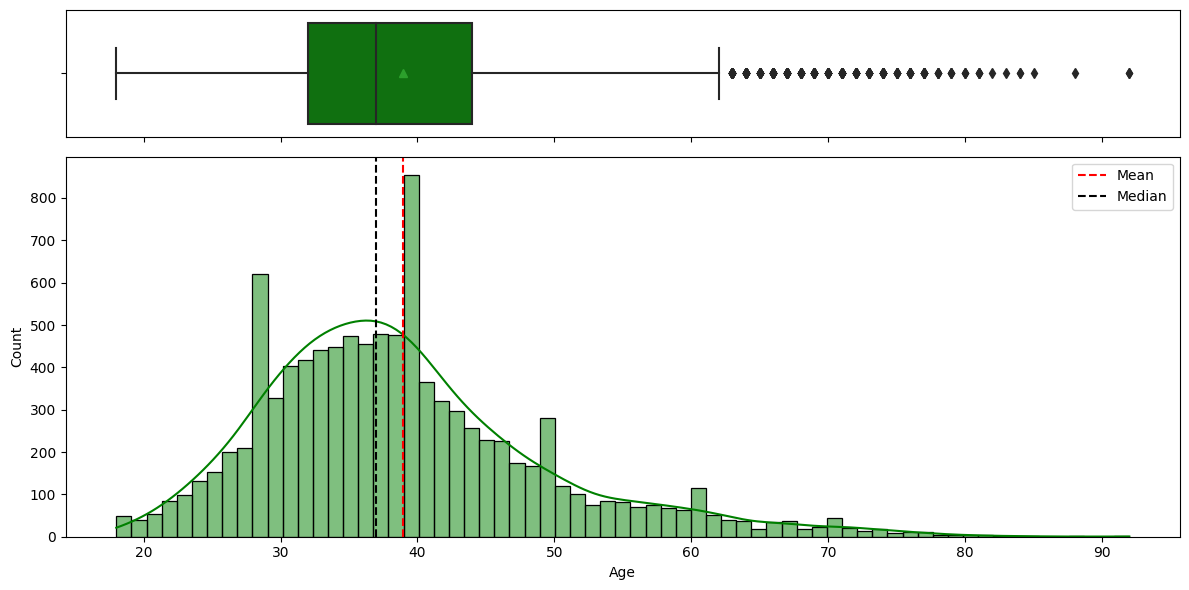

In [92]:
histogram_boxplot(df, "Age")

Observations:
-The distribution of age shows a right skew with the mean greater than the median.
-There are outliers on the right

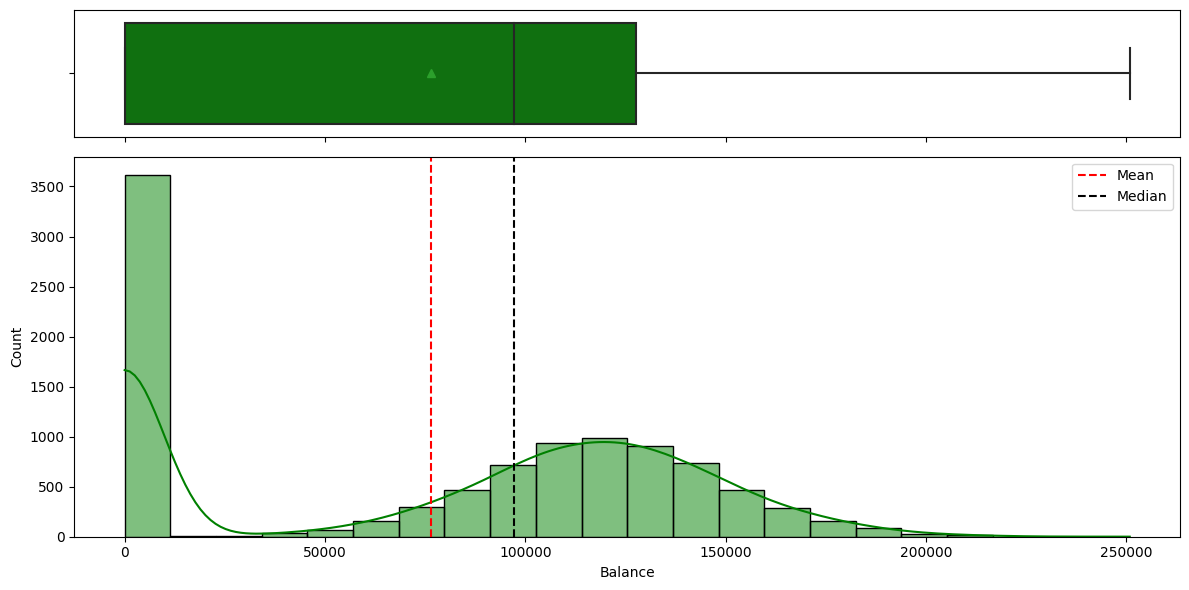

In [93]:

histogram_boxplot(df, "Balance")


Observations:
The distribution of Balance has a left skew due to the presence of high number of 0 balance accounts.

In [98]:
#categorical columns
def categorical_barplot(data,feature):

    plt.figure(figsize=(6,6))

    sns.countplot(data=data,x=feature,palette='viridis')


    value = len(data[feature])
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format((p.get_height()/value)*100)
        x_position = p.get_x() + p.get_width() / 2 - 0.1
        y_position = p.get_height() + 0.05
        plt.text(x_position, y_position, percentage, ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Bar Plot of {feature} with Percentage Labels')
    plt.show()
    plt.show()

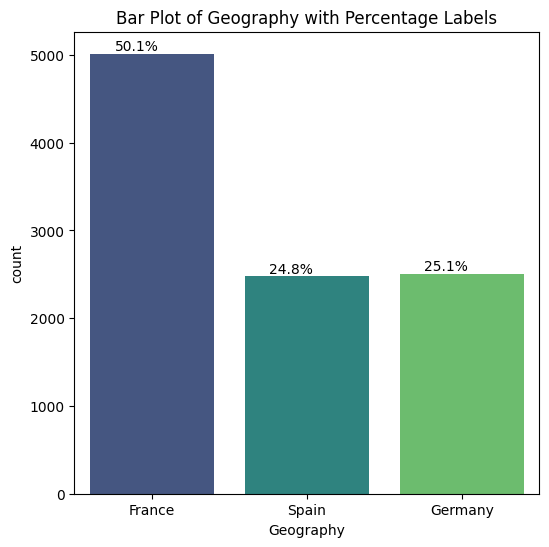

In [99]:

categorical_barplot(df, 'Geography')

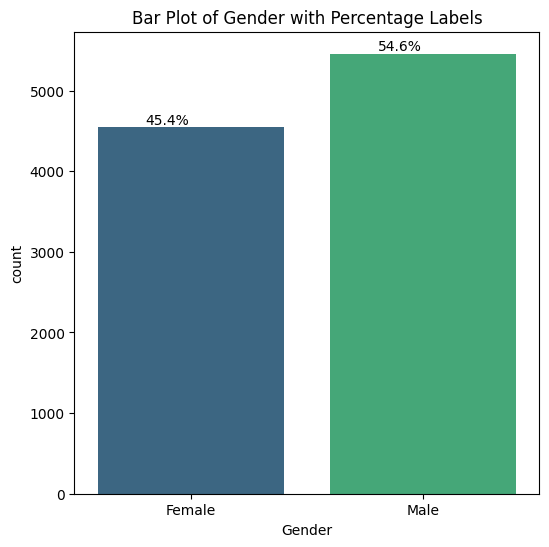

In [100]:

categorical_barplot(df, 'Gender')

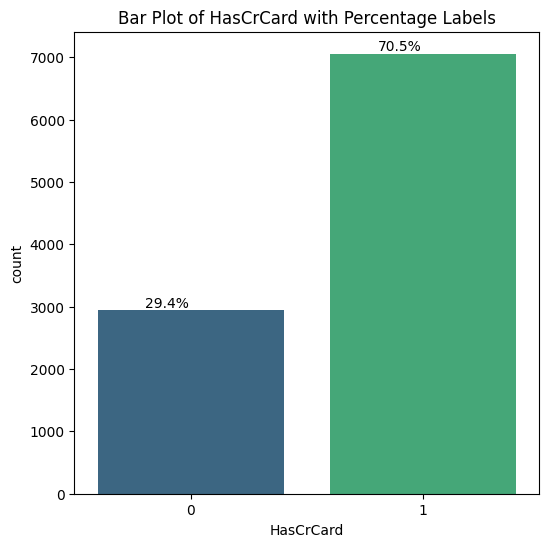

In [101]:

categorical_barplot(df, 'HasCrCard')

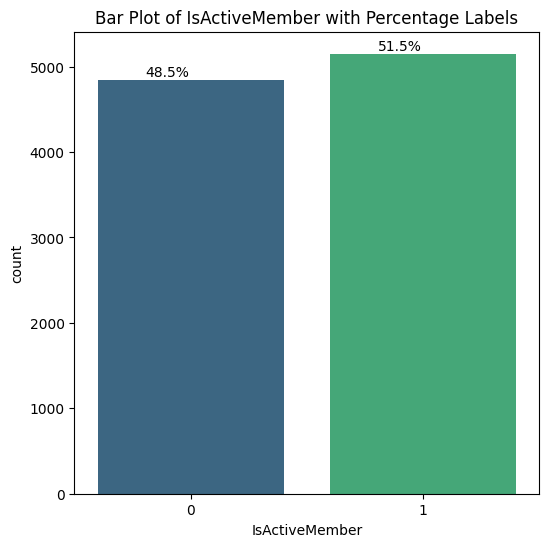

In [102]:
#how many active member in bank
categorical_barplot(df, 'IsActiveMember')

In [104]:
#
#Observations:
#51.5%(5151) of customers can be considered an active of the bank compared to 48.5% (4849) who aren'

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [106]:

df.to_csv('analytical_base_table.csv', index=None)